# 3.1 The problem with deterministic models



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

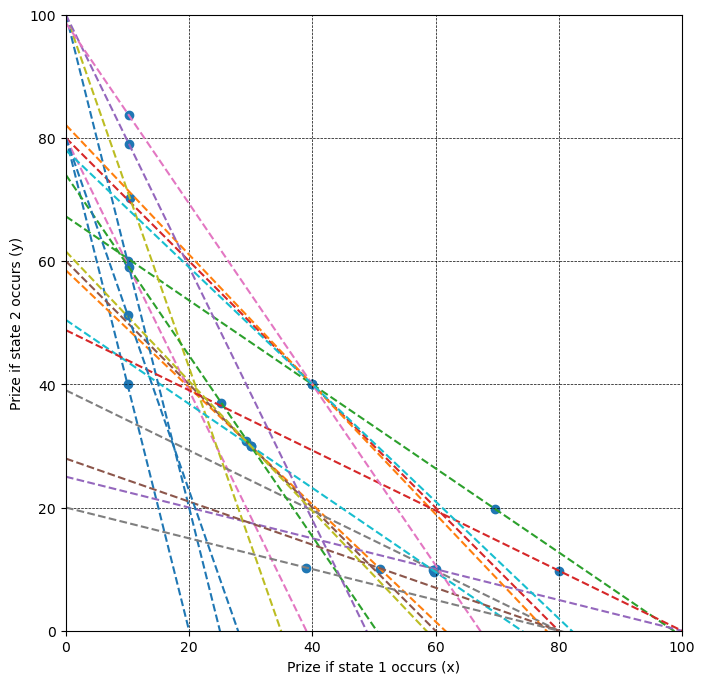

In [22]:
# Read the CSV file
Df = pd.read_csv('Data/Data_HPZ_2018.csv')
# Name the columns
Df.rename(columns={
    Df.columns[0]: 'Subject',
    Df.columns[1]: 'Observation',
    Df.columns[2]: 'X',
    Df.columns[3]: 'Y',
    Df.columns[4]: 'X-intercept',
    Df.columns[5]: 'Y-intercept'
}, inplace=True)

d = Df[Df['Subject'] == 201]


# Create a new plot with a specified figure size
fig, ax = plt.subplots(figsize=(10, 8))  # Width: 10 inches, Height: 8 inches

# Set the limits of the x and y axes
x_lim = (0, d['X-intercept'].max())
y_lim = (0, d['Y-intercept'].max())
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

# Draw each line (abline) for the data points
for index, row in d.iterrows():
    slope = -row['Y-intercept'] / row['X-intercept']
    intercept = row['Y-intercept']
    # Calculate the end points of the line
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals, '--')

# Add the points to the plot
ax.scatter(d['X'], d['Y'])

# Styling to resemble theme_bw()
ax.set_facecolor('white')
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='black')

# Set aspect ratio to be equal
ax.set_aspect('equal', adjustable='box')

# Set the labels for the axes
ax.set_xlabel("Prize if state 1 occurs (x)")
ax.set_ylabel("Prize if state 2 occurs (y)")

# Show the plot
plt.show()